# Solutions to Modern Data Science Problems

# probelms till 15.02 + 20.02 + problem 33 (Optional)

by *Mateusz Kmieć* 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import urllib.request
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import norm, expon, chi2, uniform
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 33. (Optional)

Gauss-Markov theorem

Show that the ordinary least squares estimator has the lowest variance among all
unbiased linear estimators (is an “efficient” estimator) under the assumptions that:

- Its errors have zero expectation values
- its variances are equal.
- errors are uncorrelated

### Problem 51. (Optional)

Implement the gradient descent algorithm for linear regression:
start with some initial $\left(\theta_{1}, \theta_{0} \right)$ for every iteration:

$$\theta_{k+1} = \theta_{k} - \alpha \cdot \frac{\partial E(\theta_{k})}{\partial \theta}.$$,

where $k=0,1$, $\alpha$ – learning rate

Test your implementation with some data (e.g. x03.csv) and compare with analytical
solution:

- plot $E(\theta_{k})$ vs iteration
- plot $\theta_{k}$ vs iteration 

In [4]:
#Please note 'raw' prefix in the url and the lack of 'blob' part
url='https://raw.github.com/wkrzemien/dataScienceAndML2020/master/datasets/x08.csv'
urllib.request.urlretrieve(url,'x08.csv')

FILE_NAME = 'x08.csv'

data = pd.read_csv(FILE_NAME, names=['index','inhabitants','incomeBelow5k','unemployed','murders'])
data.head()

,index,inhabitants,incomeBelow5k,unemployed,murders
0,1,587000,16.5,6.2,11.2
1,2,643000,20.5,6.4,13.4
2,3,635000,26.3,9.3,40.7
3,4,692000,16.5,5.3,5.3
4,5,1248000,19.2,7.3,24.8


In [ ]:
def loadData(filename):
    columns = ['index','inhabitants','incomeBelow5k','unemployed','murders']
    data = pd.read_csv(filename, names=columns)
    
    fraction = 0.75
    trainingSet=data.sample(frac=fraction)
    testSet=data.drop(trainingSet.index)
    
    dataset1 = trainingSet['inhabitants']
    dataset2 = trainingSet['incomeBelow5k']
    dataset3 = trainingSet['unemployed']
    dataset4 = trainingSet['murders']
    
    testset1 = testSet['inhabitants']
    testset2 = testSet['incomeBelow5k']
    testset3 = testSet['unemployed']
    testset4 = testSet['murders']
    
    
    return columns[1:4], [dataset1, dataset2, dataset3], dataset4, [testset1, testset2, testset3], testset4

In [ ]:
class MySimpleLinearRegression():
    def __init__(self):
        self._theta = [0, 0]
        self._error = 0

    def fit(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        
        #calculation of parameters, closed form solution, linear regression OLS.
        theta = np.linalg.inv(x.T*x)*x.T*y    
        self._theta = [theta.item(0),theta.item(1)] 
        
        return  self._theta

    def getParams(self):
        return self._theta

    def predict(self, x):         
        return self._theta[1]*x+self._theta[0] 
    
    def getError(self, X, Y):
        size=len(X)
        xx=np.array(X).reshape(-1, 1).reshape(size,1)
        x = np.asmatrix(np.c_[np.ones((size,1)),xx])
        y = np.array(Y).reshape(-1, 1).reshape(size,1)  
        theta=np.matrix([[self._theta[0]],[self._theta[1]]])        
        error=(((x@theta-y).T)@(x@theta-y))*(1/y.shape[0])
        self._error = error[0,0]
        return self._error

In [ ]:
def plotData(data1, data2, test1, test2, names):
    
    #model fitting
    model = MySimpleLinearRegression()
    model.fit(data1, data2)
    print("Parameters [intercept, slope] = ",model.getParams(),",")
    yPredicted = [model.predict(x) for x in data1]
        
    #Training error
    print("Training error = {:.4f}".format(model.getError(data1,data2)))
      
    #Test error
    yPredicted_test = [model.predict(x) for x in test1]
    print("Test error = {:.4f}".format(model.getError(test1,test2)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, yPredicted)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()

In [ ]:
def plotData_sklearn(data1, data2, test1, test2, names):
    
    #formatting data
    data1 = np.array(data1).reshape(-1, 1).reshape(len(data1),1)
    data2 = np.array(data2).reshape(-1, 1).reshape(len(data2),1)   
    test1 = np.array(test1).reshape(-1, 1).reshape(len(test1),1)
    test2 = np.array(test2).reshape(-1, 1).reshape(len(test2),1)
  
    #model fitting
    model = LinearRegression().fit(np.array(data1), np.array(data2))

    print("Parameters [intercept, slope] = ","[",model.intercept_[0],model.coef_[0,0],"],")
    ypred = model.predict(data1)
        
    #Training error
    print("Training error = {:.4f}".format(mean_squared_error(data2, ypred)))
      
    #Test error
    ytest = model.predict(np.array(test1))
    print("Test error = {:.4f}".format(mean_squared_error(test2,ytest)))
    
    #plot the best line and data
    plt.scatter(data1, data2)
    plt.plot(data1, ypred)  
    plt.xlabel(names)
    plt.ylabel('murder')
    plt.show()

In [ ]:
print("RESULTS FOR MySimpleLinearRegression()")
print("--------------------------------------\n")

names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

In [ ]:
print("RESULTS FOR LinearRegression() from sklearn")
print("--------------------------------------\n")

#names, datas, murder, test_sets, test_murder = loadData(FILE_NAME)
for i,d in enumerate(datas):
    plotData_sklearn(d.tolist(), murder.tolist(), test_sets[i].tolist(), test_murder.tolist(), names[i])

In [1]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
    return m_current, b_current, cost

In [ ]:
#I implemented LEAVE ONE OUT algorithm
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha_list = np.linspace(start = 0.0, stop = 0.1, num = 1000)# change here
costlist=[]
sorted_cost=[]

# add 1-3 line of code here

for alpha in alpha_list:
    error=0
    for k in range(y.shape[0]):
        xk=x
        yk=y
        xk=np.delete(xk, k, axis=0)
        yk=np.delete(yk, k, axis=0)
        wk = np.linalg.inv(xk.T@xk + alpha * I)@xk.T@yk
        wk=wk.ravel()
        error+=((y-x@wk.T)[k]*(y-x@wk.T)[k])/(y.shape[0])
        #czy tu powinno być cost=RSS+alpha*w*w.T?
    
    costlist.append(error[0,0])

min_index = costlist.index(min(costlist))   
    
fig = plt.figure()
plt.plot(alpha_list, costlist, color='blue', linewidth = 1, zorder=1)
plt.scatter(alpha_list[min_index],costlist[min_index], color='red', zorder=2)
plt.title('CROSS-VALIDATION')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

# add 1-3 lines to compare the results
print("I picked 1000 alphas from within (0,0.1).")
print("Alpha which leads to the lowest cost is {0:.6f}".format(alpha_list[min_index]))

print("\nDONE")

In [ ]:
def naive_Newton(f, dfdx, x, eps):
    while abs(f(x)) > eps:
        x = x - float(f(x))/dfdx(x)
    return x

In [ ]:
def f(x):
    return x**2 - 9

def dfdx(x):
    return 2*x

print naive_Newton(f, dfdx, 1000, 0.001)

### Probelm 52. (Optional)

Implement the Newton method and test your implementation on data from x03.csv. Once you do it you shall compare it with the analytical
solution:

- plot $E(\theta_{k})$ vs iteration

- plot $\theta_{k}$ vs iteration 

### Problem 60. (Optional)

Implement your version of Naive Bayes classifier that reads the training
sample in csv format. For simplicity you can assume that the input contains only two
classes.

### Problem 61.

Assuming the 1-D box kernel with the width w=2 and the following set of data 
$x_{i} = [1,2.5, 3,3.5,4,6,6.5,7,9]$, use KDE method to estimate pdf for points:
    
- f(0.5)
- f(4)
- f(10)

### Problem 62. 

Write a program that implements 1-D KDE estimation. Plot the estimated pdf for the
box kernel and the sample data. Plot the same pdf using the gaussian kernel instead.

### Probelm 63.

Implement a program to calculate the integral of $f(x) =cos(x)$ and $x$ in $\left[0,\frac{\pi}{2}\right]$ using MC
integration.

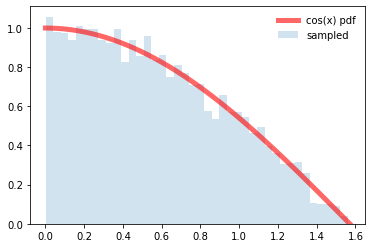

The integral that we are looking is around ~1.00.
Which can be compared with the scipy library numerical solution ~1.00.
Analytical solution of integral(cos(x),0,pi/2) = 1.00.
Luckily, we obtained a numerical solution which is congruent with the analytical solution. :)


In [69]:
sample_size=10000

def toy_dist(x):
    return np.cos(x)

x = np.linspace(0,mt.pi/2, sample_size*10)


def accept_rejection_sampling(dist, size = 1):
    naccept=0
    ymax=np.max(dist)
    samples=[]
    
    while size>0:  
        x=np.random.uniform(0,mt.pi/2)  
        y=np.random.uniform(0,ymax)   
        if y<toy_dist(x):  
            samples.append(x)  
            naccept=naccept+1  
        size=size-1;
    samples=np.array(samples)  
    
    return samples, naccept


samples, naccept = accept_rejection_sampling(toy_dist(x), size = sample_size)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='cos(x) pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

rectangle_area=mt.pi*0.5*1

integral=rectangle_area*(naccept/sample_size)
integral_scipy=quad(toy_dist, 0, mt.pi/2)
print("The integral that we are looking is around ~{:.2f}.".format(integral))
print("Which can be compared with the scipy library numerical solution ~{:.2f}.".format(integral_scipy[0]))
print("Analytical solution of integral(cos(x),0,pi/2) = 1.00.")
print("Luckily, we obtained a numerical solution which is congruent with the analytical solution. :)")

### Probelm 64.

Show that MC integral error decreases as $\frac{1}{\sqrt{N}}$ . 

I will present the heuristic proof of this property MC integrating algorithms based on importance sampling.

The central equation of importance sampling in 1-D is:

(1) $$\int_{a}^{b}f(x)dx \cong \frac{(b-a)}{N}\sum_{i=1}^{N} f(x_{i}) \cong (b-a)E[f(x)].$$

Let us notice that:

(2) $$\text{Var}(\text{mean})=\text{Var}\left(\frac{1}{N}\sum_{1}^{N}X_{i}\right)=\frac{1}{N^{2}}\text{Var}\left(\sum_{i=1}^{N}X_{i}\right)=\frac{1}{N^{2}}\text{Var}(X_{1}+...+X_{N})=\frac{N}{N^{2}}\text{Var(X)}=\frac{1}{N}\text{Var}\left(X\right)$$

Consequently, (1) can be written as:

(3) $$\text{Var}\left((b-a)E\left[f(x)\right]\right)=\frac{(b-a)^{2}}{N}\text{Var}\left(f(x)\right).$$

We know that the integration error can be written as:

(4) $$\text{error}=\sqrt{\text{Var}\left((b-a)E(f(x))\right)}=\frac{(b-a)}{\sqrt{N}}\sqrt{\text{Var}(f(x))}.$$

Which can be generelised for $n$-dimentsions (integration over n-dimensional space of volume $V$):

(5) $$\text{error}=\frac{V}{\sqrt{N}}\sqrt{\text{Var}(f(x))}.$$

We can see that the form of equetion (5) is independent of the number of dimensions that we are integrating over. The aforementioned property makes the MC integration insensitive to the curse of dimensionality QED.

### Problem 65.

Write a random generator using rejection sampling method for $f(x) = sin (x)$ and x in $\left[0,\frac{\pi}{2}\right]$.

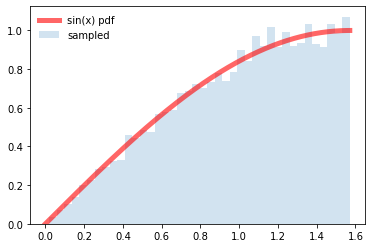

In [20]:
def toy_dist(x):
    return np.sin(x)

x = np.linspace(0,mt.pi/2,1000)


def accept_rejection_sampling(dist, size = 1):
    naccept=0
    ymax=np.max(dist)
    samples=[]
    
    while naccept<size:  
        x=np.random.uniform(0,mt.pi/2)  
        y=np.random.uniform(0,ymax)   
        if y<toy_dist(x):  
            samples.append(x)  
            naccept=naccept+1  
    samples=np.array(samples)  
    
    return samples


samples = accept_rejection_sampling(toy_dist(x), size = 10000)

fig, ax = plt.subplots(1, 1)
ax.plot(x, toy_dist(x), 'r-', lw=5, alpha=0.6, label='sin(x) pdf')
ax.hist(samples, density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled")
ax.legend(loc='best', frameon=False)
plt.show()

### Problem 66.

Write a random generator that generates exponential distribution using inverse
sampling.

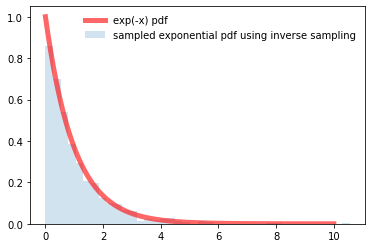

In [43]:
x = np.linspace(0, 10, 1000)

#Manually defined inverse exponential distribution cdf
def inverse_cdf_exp_dist(lamb=1.0):
    return (-1 / lamb)*mt.log(1 - np.random.random())

#manually defined exponential pdf
def exp_pdf(x, lamb):
    return lamb*np.exp(-lamb*x)

lamb=1

fig, ax = plt.subplots(1, 1)
ax.plot(x, exp_pdf(x,lamb), 'r-', lw=5, alpha=0.6, label='exp(-x) pdf')
plt.hist([inverse_cdf_exp_dist() for i in range(1000)], density=True, histtype='stepfilled', alpha=0.2, bins = 40, label = "sampled exponential pdf using inverse sampling")
ax.legend(loc='best', frameon=False)
plt.show()

### Problem 67.

Write a generator that simulates the decay of a particle with mass M into
two photons. Let’s assume that the particle is moving in the LAB frame with some velocity
V. Plot the simulated angular distributions in the LAB and CM frames.

### Probelm 68. (Optional)

Give examples of the NN weights values that would act as OR and NOT gates.

### Problem 69.

Calculate derivatives of the activation functions and express it (if possible) by the
function itself.

On slide 44 lecture 12 the activation function was chosen to be the logistic function.

(44) $$\frac{d}{d z}S(z)=\frac{d}{d z}\left(\frac{1}{1+e^{-z}}\right)=\frac{e^{-z}}{(1+e^{-z})^{2}}=\frac{1}{1+e^{-z}}\frac{e^{-z}}{1+e^{-z}}.$$

The first factorial in (44) is S(x) therefore:

(45)$$\frac{d}{d z}S(z)=S(z)\frac{-1+1+e^{-z}}{1+e^{-z}}=S(z)(1-S(z)).$$

The next prominent activation function mentioned during the lecture was $\text{RelU}(0,z) = \text{max}(0,z)$ function.

We can easily see that in this case the derivative is the following piecewise function:

$$\frac{d}{dz}\text{RelU}(z,0)=\begin{cases} 
      1 & z \geq 0 \\
      0 & z < 0.
   \end{cases}$$


This is equivallent to:

$$\frac{d}{dz}\text{RelU}(z,0)=\begin{cases} 
      \text{RelU}(1,0) & z \geq 0 \\
      \text{RelU}(-1,0) & z < 0.
\end{cases}$$


The lecturer presented $\text{tanh}(z)$ activation function. In this case we have:

$$\text{tanh}(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}},$$

$$\frac{d}{dz}\text{tanh}(z)=\frac{\left(e^{z}+e^{-z}\right)\left(e^{z}+e^{-z}\right)-\left(e^{z}-e^{-z}\right)\left(e^{z}-e^{-z}\right)}{\left(e^{z}+e^{-z}\right)^{2}}=1-\text{tanh}^{2}(z).$$

The last activation function mentioned during the lecture is the softplus function:

$$f(z)=\ln(1+\exp(z))$$

$$\frac{d}{dz}f(z)=\frac{e^{z}}{1+e^{z}}=\frac{1}{1+e^{-z}}=\text{logistic function}=S(z).$$

### Problem 70.

Calculate the backpropagation for logistic regression model.